In [5]:

import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
class RBN:
  
  def __init__(self,inputs,target,N,centers,bs):
    self.inputs=inputs
    self.N=N
    self.bs=bs
    self.centers=centers
    self.target=target
  
  def distance(self,a,b):
    if(np.ndim(a)==0 and np.ndim(b)==0):
      return np.abs(a-b)
    else:
      s=0
      for i in range(len(a)):
        s += pow(a[i]-b[i],2)
      return np.sqrt(s)
    
  def predict(self,inputs):
    M=[]
    for i in range(self.inputs.shape[0]):
      NN=np.zeros(self.N)
      for j in range(self.N):
        NN[j]=np.exp(-((self.distance(self.inputs[i],self.centers[j])*self.bs[j])**2))
      M.append(NN)  
      print(np.array(M))
      print(self.centers)    
    model=Sequential()
    model.add(Dense(1,activation='linear'))
    model.compile(loss='mse',optimizer='adam')
    model.fit(np.array(M),self.target,epochs=1000)
    return model.predict(np.array(M))           


In [11]:
X = np.array([[0,0],[0,1],[1,0],[1,1]])
yxor = np.array([[0],[1],[1],[0]])
rbnx=RBN(X,yxor,2,np.array([[0,1],[1,0]]),np.array([1,1,1]))
print(rbnx.predict(X))

[[0.36787944 0.36787944]]
[[0 1]
 [1 0]]
[[0.36787944 0.36787944]
 [1.         0.13533528]]
[[0 1]
 [1 0]]
[[0.36787944 0.36787944]
 [1.         0.13533528]
 [0.13533528 1.        ]]
[[0 1]
 [1 0]]
[[0.36787944 0.36787944]
 [1.         0.13533528]
 [0.13533528 1.        ]
 [0.36787944 0.36787944]]
[[0 1]
 [1 0]]
Epoch 1/1000
1/1 [==============================] - 0s 6ms/step - loss: 0.2529
Epoch 2/1000
1/1 [==============================] - 0s 1ms/step - loss: 0.2524
Epoch 3/1000
1/1 [==============================] - 0s 1ms/step - loss: 0.2520
Epoch 4/1000
1/1 [==============================] - 0s 2ms/step - loss: 0.2515
Epoch 5/1000
1/1 [==============================] - 0s 2ms/step - loss: 0.2510
Epoch 6/1000
1/1 [==============================] - 0s 2ms/step - loss: 0.2505
Epoch 7/1000
1/1 [==============================] - 0s 2ms/step - loss: 0.2500
Epoch 8/1000
1/1 [==============================] - 0s 2ms/step - loss: 0.2495
Epoch 9/1000
1/1 [==============================] - 0s

[[1.00000000e+00 1.83156389e-02 1.12535175e-07]]
[-2  0  2]
[[1.00000000e+00 1.83156389e-02 1.12535175e-07]
 [9.60789439e-01 3.91638951e-02 5.35534780e-07]]
[-2  0  2]
[[1.00000000e+00 1.83156389e-02 1.12535175e-07]
 [9.60789439e-01 3.91638951e-02 5.35534780e-07]
 [8.52143789e-01 7.73047404e-02 2.35257520e-06]]
[-2  0  2]
[[1.00000000e+00 1.83156389e-02 1.12535175e-07]
 [9.60789439e-01 3.91638951e-02 5.35534780e-07]
 [8.52143789e-01 7.73047404e-02 2.35257520e-06]
 [6.97676326e-01 1.40858421e-01 9.54016287e-06]]
[-2  0  2]
[[1.00000000e+00 1.83156389e-02 1.12535175e-07]
 [9.60789439e-01 3.91638951e-02 5.35534780e-07]
 [8.52143789e-01 7.73047404e-02 2.35257520e-06]
 [6.97676326e-01 1.40858421e-01 9.54016287e-06]
 [5.27292424e-01 2.36927759e-01 3.57128496e-05]]
[-2  0  2]
[[1.00000000e+00 1.83156389e-02 1.12535175e-07]
 [9.60789439e-01 3.91638951e-02 5.35534780e-07]
 [8.52143789e-01 7.73047404e-02 2.35257520e-06]
 [6.97676326e-01 1.40858421e-01 9.54016287e-06]
 [5.27292424e-01 2.36927759e

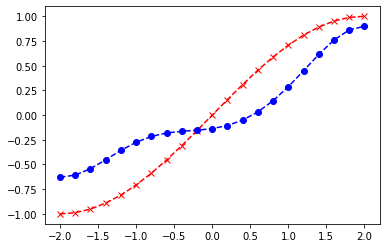

In [12]:
X = np.linspace(-2, 2, 21)  
y = np.sin((np.pi/4)*X)       
rbn=RBN(X,y,3,np.array([-2,0,2]),np.array([1,1,1]))
plt.figure()
plt.plot(X,y,'r--x',X,rbn.predict(X),'b--o')
plt.show()